Взять датасет из google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats import proportion

In [2]:
df = pd.read_csv('marketing_campaign.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10022 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


In [3]:
df.head(5)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [4]:
df.describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
count,10037,10021,10022,10037,10037,10022
unique,10037,31,5,2,4,2
top,a1000,1/15/18,House Ads,control,English,False
freq,1,789,4733,5091,9793,8946


In [6]:
df.dropna(inplace = True)
df = df.astype({'converted': 'int32'})

In [18]:
df['converted'].value_counts()

0    8945
1    1076
Name: converted, dtype: int64

Посмотрим статистики конверсии по группам

In [8]:
df.loc[df['variant'] == 'personalization', 'converted'].mean()

0.14256825075834176

In [9]:
df.loc[df['variant'] == 'control', 'converted'].mean()

0.0730890464933018

Конверсия 'personalisation' (0.14) > конверсии 'control' (0.07)

Проведем статтест

In [10]:
k1 = df[df['variant']=='control']['converted'].sum()
n1 = df[df['variant']=='control'].shape[0]
k2 = df[df['variant']=='personalization']['converted'].sum()
n2 = df[df['variant']=='personalization'].shape[0]

In [11]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=-11.232 pvalue=0.000


pvalue < 5% - Из чего следует, что разница статзначима.

Дополнительно посмотрим Хи-Квадрат Пирсона

In [12]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=126.158 pvalue=0.000


In [ ]:
pvalue < 5% - Из чего следует, что разница статзначима

Отрисуем

In [14]:
grouped = df.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371,5076
personalization,705,4945


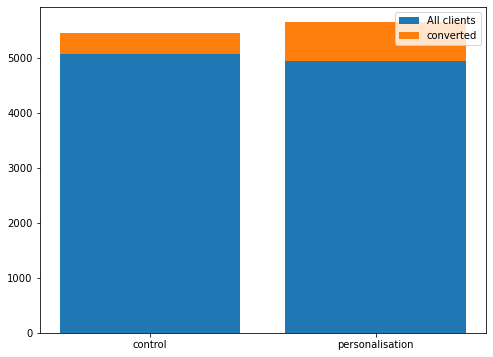

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['converted'], label='All clients')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='converted')
plt.xticks([1, 2], ['control', 'personalisation'])
plt.legend();

по графику также видно, что разница значима